This file is meant to test changes to the noisy gates library downloaded in this folder offline

get API key here: ```https://cloud.ibm.com/iam/apikeys```



### Preparation

In [1]:
import os
os.chdir("/Users/cherie/Desktop/quantum-gates/src")  # or any folder that actually exists
print(os.getcwd())

import  qiskit, qiskit_aer, qiskit_ibm_runtime
print("Qiskit:", qiskit.__version__)
print("Aer:", qiskit_aer.__version__)
print("IBM Runtime:", qiskit_ibm_runtime.__version__)


# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import os, sys, importlib
from typing import List
from dotenv import load_dotenv

# Qiskit
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.controlflow import ControlFlowOp
from qiskit.result import marginal_counts
from qiskit.transpiler import CouplingMap, Layout
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeBrisbane

# 0) Point to the *parent* of the package folder
LOCAL_QG_PATH = r"../src"   # or r"C:\Users\npace\Desktop\quantum-gates\src"
LOCAL_QG_PATH = os.path.abspath(LOCAL_QG_PATH)

# 1) Put local src at the very front of sys.path
if LOCAL_QG_PATH in sys.path:
    sys.path.remove(LOCAL_QG_PATH)
sys.path.insert(0, LOCAL_QG_PATH)

# 2) Purge any cached copies of the package
for m in list(sys.modules):
    if m == "quantum_gates" or m.startswith("quantum_gates."):
        del sys.modules[m]

# 3) Invalidate import caches and import the local package
importlib.invalidate_caches()
print(os.getcwd())
import quantum_gates

print("Using quantum_gates from:", quantum_gates.__file__)

# Own library
from quantum_gates.utilities import fix_counts
from quantum_gates.simulators import MrAndersonSimulator
from quantum_gates.gates import standard_gates
from quantum_gates.circuits import EfficientCircuit, BinaryCircuit
from quantum_gates.utilities import DeviceParameters
from quantum_gates.utilities import setup_backend
from quantum_gates.utilities import RotatedSurfaceCode
    
    
# -------------------------------
# Create and load the fake backend
# -------------------------------

# dump_from_fake_backend.py
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
  # try other Fake*V2 if needed
from quantum_gates.utilities import DeviceParameters

# Pick a fake backend
backend = FakeBrisbane()  # 127 qubits; change to another Fake*V2 if import fails


/Users/cherie/Desktop/quantum-gates/src
Qiskit: 2.2.3
Aer: 0.17.2
IBM Runtime: 0.41.1
/Users/cherie/Desktop/quantum-gates/src
Using quantum_gates from: /Users/cherie/Desktop/quantum-gates/src/quantum_gates/__init__.py


### Create Circuit

Stabilizer (2, 4) (X) measures data qubits: []
Stabilizer (2, 6) (X) measures data qubits: []
Stabilizer (4, 10) (X) measures data qubits: []
Stabilizer (4, 12) (X) measures data qubits: []
Stabilizer (0, 0) (Z) measures data qubits: []
Stabilizer (2, 5) (Z) measures data qubits: []
Stabilizer (4, 11) (Z) measures data qubits: []
Stabilizer (6, 16) (Z) measures data qubits: []
Parity-check matrix for X stabilizers built.
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
Parity-check matrix for Z stabilizers built.
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
Decoder setup complete.
[(1, 1), (1, 2), (1, 3), (3, 7), (3, 8), (3, 9), (5, 13), (5, 14), (5, 15)]
[(2, 4), (2, 6), (4, 10), (4, 12)]
[(0, 0), (2, 5), (4, 11), (6, 16)]
{0: [2, 3], 4: [1, 7], 5: [1, 2, 7, 8], 6: [2, 3, 8, 9], 10: [7, 8, 13, 14], 11: [8, 9, 14, 15], 12: [9, 15], 16: [13, 14]}


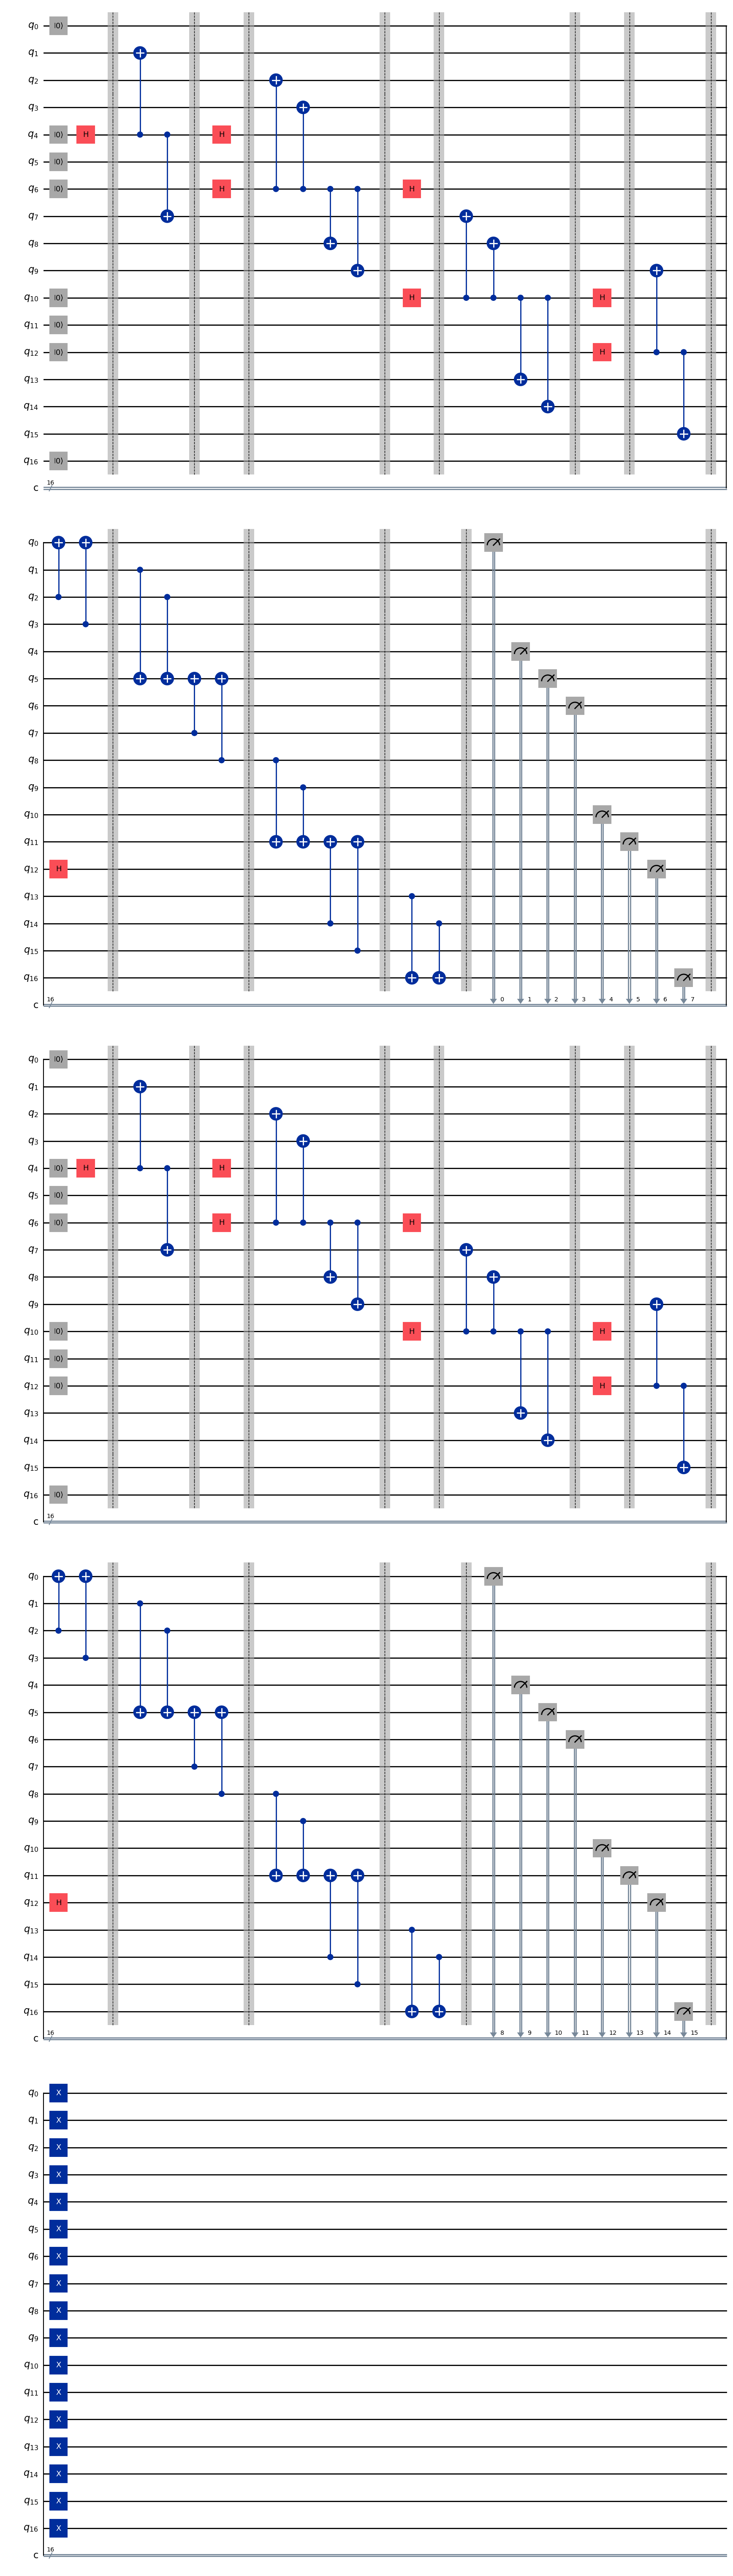

In [2]:
code = RotatedSurfaceCode(distance=3, cycles=2)
qc = code.qc
for q in range(code.n_data + code.n_stabilizers):
    qc.x(q)  # introduce bit-flip errors on all data qubits
qc.draw("mpl")

print(code.data)
print(code.x_stabilizers)
print(code.z_stabilizers)

print(code.neighbors)
code.qc.draw("mpl")

In [3]:
mid_counts = code.run_surfacecode(noise = False)
print(mid_counts)

Qubits used in transpiled circuit: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
---- Preprocessed data ----
Fancy 0: reset_qubits qubits=[0]
Fancy 1: reset_qubits qubits=[4]
Chunk 2: rz[4] , sx[4] , rz[4]
Fancy 3: reset_qubits qubits=[5]
Fancy 4: reset_qubits qubits=[6]
Fancy 5: reset_qubits qubits=[10]
Fancy 6: reset_qubits qubits=[11]
Fancy 7: reset_qubits qubits=[12]
Fancy 8: reset_qubits qubits=[16]
Chunk 9: rz[1] , sx[1] , rz[1] , rz[2] , sx[2] , ecr[2, 1] , rz[1] , sx[1] , rz[2] , sx[2] , rz[2] , ecr[2, 1] , rz[1] , rz[2] , sx[2] , rz[2] , ecr[2, 1] , rz[1] , sx[1] , rz[1] , x[2] , rz[3] , sx[3] , ecr[3, 2] , rz[2] , sx[2] , rz[3] , sx[3] , rz[3] , ecr[3, 2] , rz[2] , rz[3] , sx[3] , rz[3] , ecr[3, 2] , rz[2] , sx[2] , rz[2] , rz[3] , sx[3] , rz[3] , rz[4] , ecr[4, 3] , rz[4] , sx[4] , rz[4] , rz[5] , sx[5] , rz[5] , ecr[4, 5] , rz[4] , sx[4] , rz[4] , rz[5] , sx[5] , ecr[4, 5] , rz[4] , sx[4] , rz[4] , rz[5] , ecr[4, 5] , rz[4] , sx[4] , rz[4] , x[5] , rz[5] , rz[6

TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
code.plot_results(mid_counts, plot_each_shot=True)

#label=f"cycle_{cycle}_end"


In [8]:
# Simulate with Aer

sim = AerSimulator()
t_circ = code.qc
t_qc = transpile(t_circ, sim)
result = sim.run(t_qc, shots=2048).result()
counts = result.get_counts()


In [ ]:
t_qc.draw("mpl")    

In [ ]:
print("Aer All clbits counts:", counts)
plot_histogram(counts, title="Aer All classical bits")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Resolution of the k-grid
Nk = 401
kx = np.linspace(-np.pi, np.pi, Nk)
ky = np.linspace(-np.pi, np.pi, Nk)
KX, KY = np.meshgrid(kx, ky)

def integrand(kx, ky, m):
    dx = np.sin(kx)
    dy = np.sin(ky)
    dz = m - np.cos(kx) - np.cos(ky)
    denom = np.sqrt(dx*dx + dy*dy + dz*dz)
    return dz / denom

def compute_I(m):
    f = integrand(KX, KY, m)
    # BZ integral over kx, ky
    dk = (2*np.pi) / Nk
    integral = np.sum(f) * dk * dk / (2*np.pi)**2
    return integral

# Range of m parameters to scan
m_values = np.linspace(-4, 4, 200)
I_values = [compute_I(m) for m in m_values]

# Plot
plt.figure(figsize=(7,5))
plt.plot(m_values, I_values, lw=2)
plt.axvline(-2, color='k', ls='--', alpha=0.3)
plt.axvline(0, color='k', ls='--', alpha=0.3)
plt.axvline(2, color='k', ls='--', alpha=0.3)
plt.xlabel("m")
plt.ylabel("I(m)")
plt.title("Integral of the magnetization integrand")
plt.grid(True)
plt.show()
